# Large-scale Content-Based Image Retrieval
---

This is how we would implement a CBIR model.  
We will divide the CBIR into different functionalities and address each functional block as we go through the notebook. In the last part of the session, we will put everything together.

In [17]:
class CBIR:
    def __init__(self, dataset):
        self.dataset = dataset
        self.index = None  # we haven't built an indexed database yet
        return
    
    # >> TASK 1
    def find_keypoints(self, image):
        # Implement me using Maximally Stable Extremal Region
        raise NotImplemented
        # return keypoints on image
        
    # >> TASK 2
    def extract_features(self, image):
        # Implement me using Scale Invariant Feature Transform
        raise NotImplemented
        # return a list of 128-vector features
    
    # >> TASK 3
    def create_vocabulary(self):
        # Implement me using Hierarchical kmeans, Bag of Visual Word, and Term Frequency-Inverse Document Frequency (TF-IDF)  
        raise NotImplemented
        # return the tree and the index

    # >> TASK 4
    def encode(self, image):
        # Implement me using vocabulary tree, please
        raise NotImplemented
        # return the vector representation of an image
    
    # >> TASK 5
    def score(self, image_a, image_b):
        raise NotImplemented
        # return the similarity score between two images
    
    # >> TASK 6
    def retrieve(self, query_image):
        # this is the function we have described above
        raise NotImplemented
        # return the most similar images to the query image

### 1.3. Creating a visual vocabulary

<div style="margin:auto; float:right; margin-left: 50px; width: 60%">
<img src="images/tree_structure.png">
<!-- <em>Add image caption with reference</em> -->
</div>
<br>
    
<p style="color: #a00; font-weight: 700">>> TASK 3</p>

> In this section we are going to learn how to implement the function:
```python
# >> TASK 3
def create_vocabulary(features):
    # Implement me using Hierarchical kmeans
    # return the tree and the index
```

In this section we provide a structure to the set of image representations collected in **1.2**.  
We implement the [**Vocabulary tree structure**](https://ieeexplore.ieee.org/document/1641018) illustrated by Nister [ref], which uses Hierarchical KMeans to build the tree, and Term Frequency-Inverse Document Frequency to index each sample of the database.

<!-- A visual vocabulary is a list of key value pairs, where:
- The key is the id of the image
- The value is representation of the image into a vector
 -->
**How we construct this vector is key for the retrieval performance**

In this implementation of a Vocabulary Tree [ref], we:  
***A.*** Build a hierarchical structure that largely fits the dataset: **the Tree**  
***B.*** ***Index*** the images into the database, by propagating an image down the tree

#### A. Building the tree using hierarchical k-means

<br>
<div style="margin:auto; float:left; margin-right: 50px; width: 33%;">
<img src="images/kmeans.png">
<!-- <em>Add image caption with reference</em> -->
</div>
<br>

In this section we are going to hierarchically separate the features into clusters.  
Given a set of features, they are split into `k` clusters.  
The procedure is applied recursively on each of the clusters, until we reach a depth `L`.


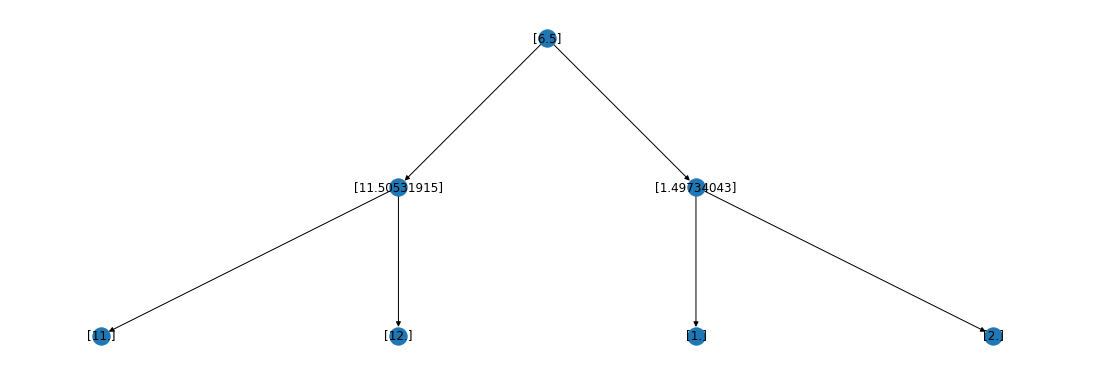

In [23]:
from cbir import CBIR
import numpy as np

# initialise the database
database = CBIR("data/jpg", n_branches=2, depth=2)

# perform hierarchical k-means clustering on the features
features = np.array([[1.], [2.], [11.], [12.]])
database.fit(features)

# plot the graph
fig = database.draw(figsize=(15, 5), labels=database.nodes)

#### 1.3. Indexing the tree using Term Frequency-Inverse Document Frequency

<div style="margin:auto; float:right; margin-left: 50px; width: 30%">
<!-- <img src="images/vocabulary_tree.png"> -->
<!-- <em>Add image caption with reference</em> -->
</div>
<br>
    
<p style="color: #a00; font-weight: 700">>> TASK 4</p>

> In this section we are going to learn how to implement the function:
```python
def encode(dataset):
    return indexed_database
```

In this section we provide a structure to the set of image representations collected in **1.2**.  
We implement the [**Vocabulary tree structure**](https://ieeexplore.ieee.org/document/1641018) illustrated by Nister [ref], which uses inverted indices and hierarchical k-means to build the graph.

## 2. Online stage: get the _n_ most similar instances from a query image

**2.1 Image Scoring**  
<!-- <div style="margin-left: 230px"> -->
<br>


<p style="color: #a00; font-weight: 700">>> TASK 5</p>

> In this section we are going to learn how to implement the function:
```python
def score(database, image):
    return score
```
<!-- </div> -->


In [ ]:
# We add some code here

**2.2 Reindexing**

Maybe this is not necessary *AAB: Agree - delete; I will discuss the pain of reindexing in lecture*

In [ ]:
# We add some code here

## 3. Complete CBIR model
Here we bring together all the concepts we have illustrated above to build our Large-Scale CBIR system.

In [ ]:
# We add some code here

## 4. [Optional] Features extraction with Deep Convolutional Neural Networks
The excercises below this point are not mandatory. They provide a wider picture on how to build an efficient image representation. We will illustrate two techniques that will require elements of Deep Learning:
- 4.1 Using pretrained deep artificial neural networks to build a representation of the image
- 4.2 Fine tune a pretrained model on our database

**4.1 Using a pre-trained network**

We can either:
- Illustrate http://www.cs.toronto.edu/~fritz/absps/esann-deep-final.pdf and use denoising autoencoders,
- Or go more basic and use a DCNN (https://arxiv.org/abs/1404.1777)

Regardless, I think that the best option is to use a pre-trained network - ResNet50?.  

We can add also another step, if we have the time and people have the will, in wich we fine tune the network (only last layer?) on our database

In [ ]:
# we add some code here